In [9]:
import numpy as np
import pandas as pd

# Import CSV file
file_path = "/Users/lobster/Desktop/Movie Replication Set.csv"

df = pd.read_csv(file_path)

df.head()


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [10]:
# Create an empty dictionary to store the arrays after removing NaNs
cleaned_data = {}

# Perform element-wise removal of NaNs for each column
for column in df.columns:
    column_array = pd.to_numeric(df[column], errors='coerce').values
    column_array = column_array[np.isfinite(column_array)]
    cleaned_data[column] = column_array

# Show the number of non-missing elements for the first 10 columns as a sample
sample_cleaned_data = {key: len(value) for key, value in list(cleaned_data.items())[:10]}
print("Sample cleaned data lengths:", sample_cleaned_data)

Sample cleaned data lengths: {'The Life of David Gale (2003)': 76, 'Wing Commander (1999)': 71, 'Django Unchained (2012)': 453, 'Alien (1979)': 289, 'Indiana Jones and the Last Crusade (1989)': 463, 'Snatch (2000)': 128, 'Rambo: First Blood Part II (1985)': 182, 'Fargo (1996)': 254, 'Let the Right One In (2008)': 137, 'Black Swan (2010)': 588}


In [12]:
from scipy import stats
import numpy as np
import pandas as pd

# Extract the ratings for 'Shrek (2001)' and the gender identity column from cleaned_data
shrek_ratings = np.array(cleaned_data['Shrek (2001)'])
gender_identity = np.array(cleaned_data['Gender identity (1 = female; 2 = male; 3 = self-described)'])

# Find the common length
common_length = min(len(shrek_ratings), len(gender_identity))

# Truncate both arrays to this common length
shrek_ratings = shrek_ratings[:common_length]
gender_identity = gender_identity[:common_length]

# Create a DataFrame to hold both 'Shrek (2001)' ratings and gender identity
temp_df = pd.DataFrame({'Shrek_Ratings': shrek_ratings, 'Gender_Identity': gender_identity})

# Separate the ratings by gender (1 = female, 2 = male)
shrek_female_ratings = temp_df[temp_df['Gender_Identity'] == 1]['Shrek_Ratings']
shrek_male_ratings = temp_df[temp_df['Gender_Identity'] == 2]['Shrek_Ratings']

# Check for equal variance using Levene's test
levene_stat, levene_p = stats.levene(shrek_female_ratings, shrek_male_ratings)

# Set the significance level for the variance test
variance_significance_level = 0.05

# If p-value is less than the significance level, variances are unequal
if levene_p < variance_significance_level:
    print("Variances are unequal, using Welch's t-test")
    t_stat, p_value = stats.ttest_ind(shrek_female_ratings, shrek_male_ratings, equal_var=False)
else:
    print("Variances are equal, using standard independent samples t-test")
    t_stat, p_value = stats.ttest_ind(shrek_female_ratings, shrek_male_ratings, equal_var=True)

# Set the per-test significance level 𝛼 to 0.005 for the t-test
significance_level = 0.005

# Compare the p-value to the significance level
is_significant = p_value < significance_level

# Print the results
print(f"t-statistic: {t_stat}, p-value: {p_value}, Is significant: {is_significant}")


# Conduct an independent t-test
t_stat, p_value = stats.ttest_ind(shrek_female_ratings, shrek_male_ratings, equal_var=False)

# Set the per-test significance level 𝛼 to 0.005
significance_level = 0.005

# Compare the p-value to the significance level
is_significant = p_value < significance_level

# Print the results
print(f"t-statistic: {t_stat}, p-value: {p_value}, Is significant: {is_significant}")


Variances are equal, using standard independent samples t-test
t-statistic: 1.4587402820113828, p-value: 0.14495061666213085, Is significant: False
t-statistic: 1.4504031015848629, p-value: 0.1477161223789387, Is significant: False


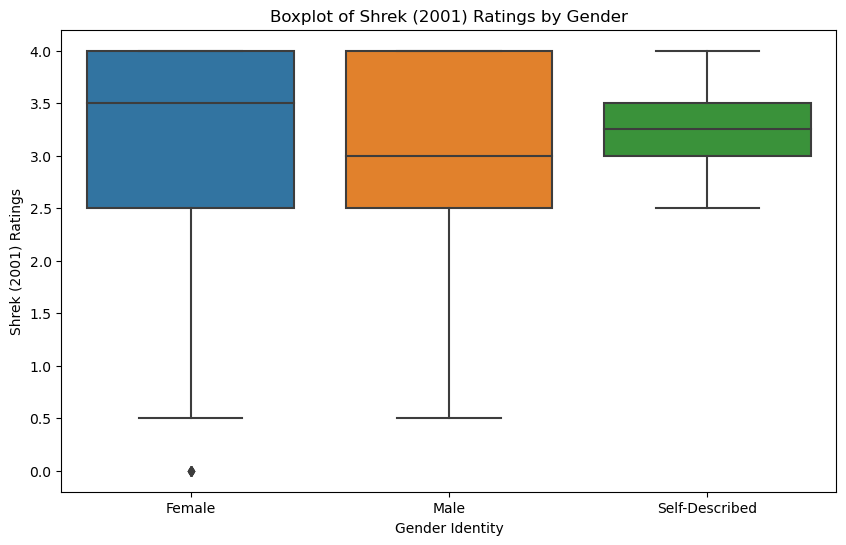

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the ratings for 'Shrek (2001)' and the gender identity column
shrek_ratings = pd.to_numeric(df['Shrek (2001)'], errors='coerce')
gender_identity = pd.to_numeric(df['Gender identity (1 = female; 2 = male; 3 = self-described)'], errors='coerce')

# Create a DataFrame to hold both 'Shrek (2001)' ratings and gender identity, and drop NaNs
temp_df = pd.DataFrame({'Shrek_Ratings': shrek_ratings, 'Gender_Identity': gender_identity})
temp_df.dropna(subset=['Shrek_Ratings', 'Gender_Identity'], inplace=True)

# Map gender identity to labels for better visualization
temp_df['Gender_Identity'] = temp_df['Gender_Identity'].map({1: 'Female', 2: 'Male', 3: 'Self-Described'})

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Identity', y='Shrek_Ratings', data=temp_df)
plt.title('Boxplot of Shrek (2001) Ratings by Gender')
plt.xlabel('Gender Identity')
plt.ylabel('Shrek (2001) Ratings')
plt.show()
